# SCGLE Workshop

by 

Jesús Benigno Zepeda López

contact: benignoz@ifisica.uaslp.mx

# Outline
- Jupyter Installation
- LANIMFE's Julia repositories
-- Approximation Grids
-- Structural approximations
-- Liquids Dynamics

# Jupyter Installation

Requirements:

- Julia
- Internet Connection


Inside a Julia terminal press the key "]" to prompt the package environment
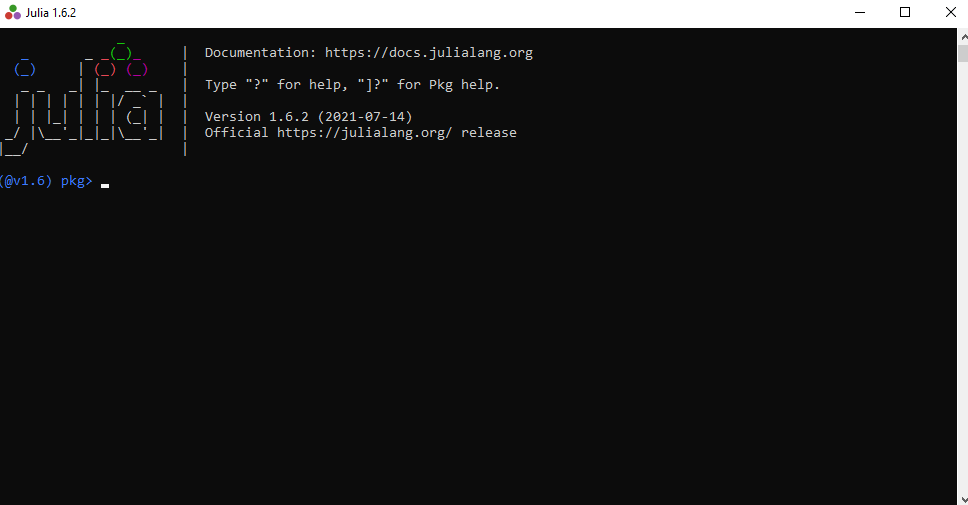

Write down the command "add IJulia" and press enter
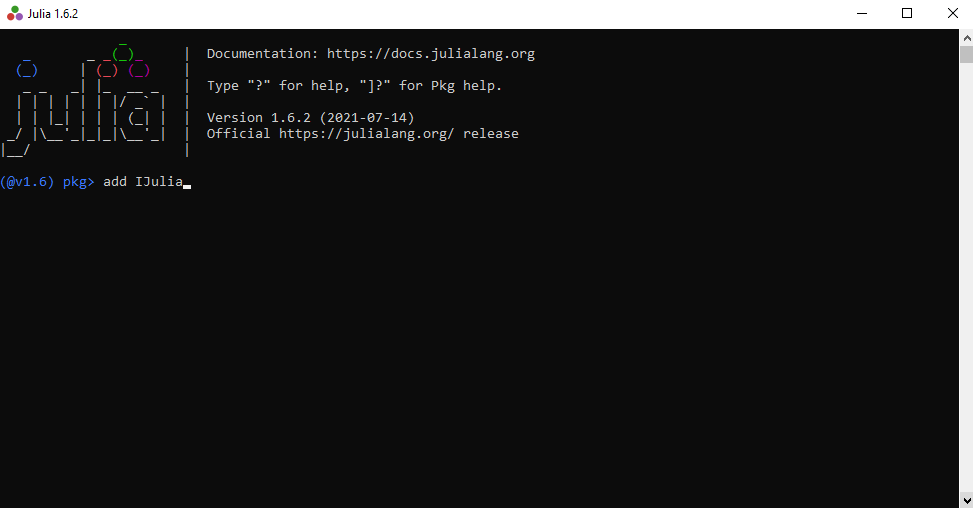

If installation occured without any set back, a message similar to this should appear
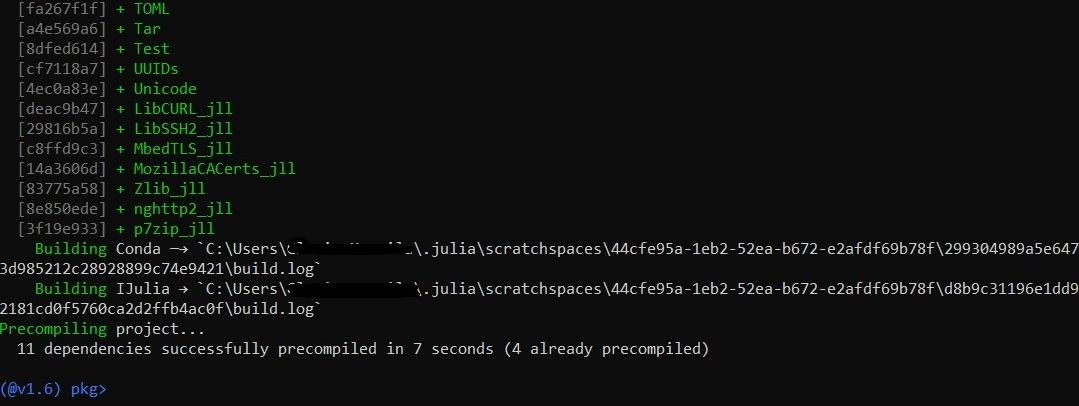

Return to Julia environment by pressing the "backspace" key

Load the IJulia package to the current Julia session by running "using IJulia" command

Start Jupyter notebook by running the function "notebook()"

The first time it is run, it will ask to install Jupyter via Conda, simply follow the instructions

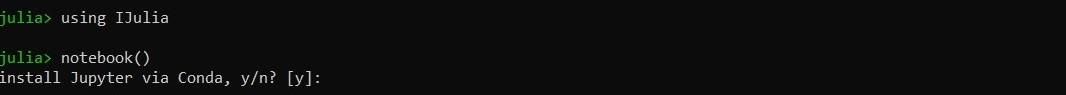

If everything was installed correctly, a window in your main internet navigator will be open, or an app will ask for permission to be open with a navigator program, accept correspondingly. From here on, you can open/create notebooks (.ipynb files) similar to this.
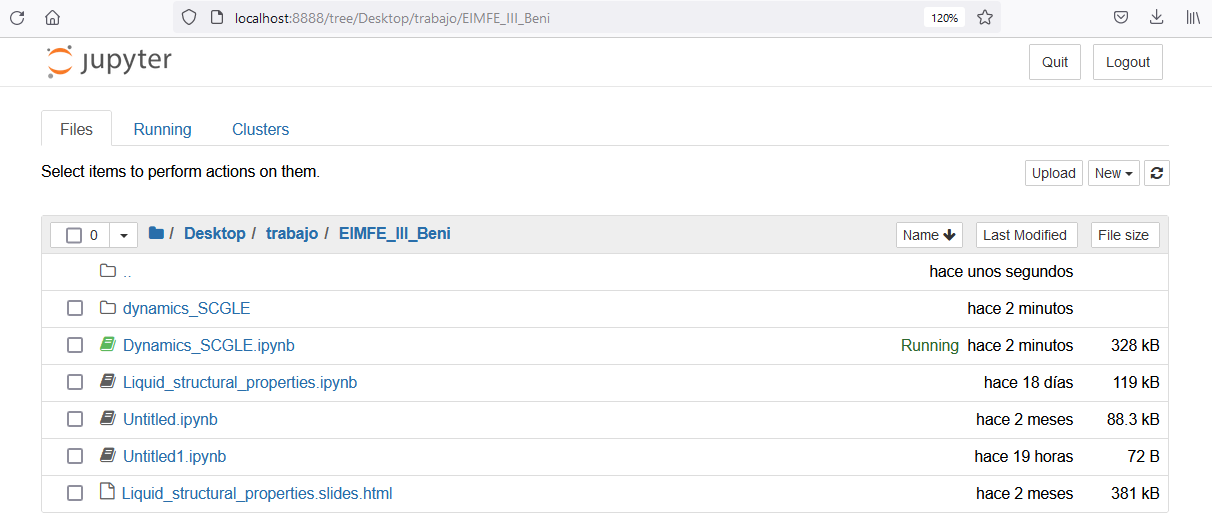

# LANIMFE's Julia repositories


To download the repositories you can make use of the add environment and simply add the url of the wanted repository. Another way around this is to simply run the next cell:

### Approximation Grids:
    Implementation of several nodes and weights methods for integration purposes.
### Liquids Structure:
    Implementation of different structure factors for different fluids.

### Liquids Dynamics:
    Implementation of numerical solution to SCGLE coupled set of equations.
### Liquids NEq Processes:
    Implementation of numerical solution to NE-SCGLE equations. (Under construction)

In [1]:
using Pkg

# The next line only needs to be called once per Julia installation
pkg"registry add https://github.com/LANIMFE/LANIMFE-Registry"

pkg"activate ."
pkg"instantiate"

     Cloning registry from "https://github.com/LANIMFE/LANIMFE-Registry"
Registry `LANIMFE` already exists in `C:\Users\Beni\.julia\registries\LANIMFE`.
  Activating project at `C:\Users\Beni\Desktop\trabajo\EIMFE_III_Beni\dynamics_SCGLE`
Precompiling project...
  ✓ IniFile
  ✓ LaTeXStrings
  ✓ URIs
  ✓ Formatting
  ✓ Grisu
  ✓ OpenBLAS_jll
  ✓ Contour
  ✓ MacroTools
  ✓ LibVPX_jll
  ✓ Xorg_libXau_jll
  ✓ Xorg_xtrans_jll
  ✓ Xorg_libXdmcp_jll
  ✓ IntelOpenMP_jll
  ✓ Libgpg_error_jll
  ✓ Wayland_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Showoff
  ✓ libblastrampoline_jll
  ✓ FFMPEG_jll
  ✓ HTTP
  ✓ Latexify
  ✓ MKL_jll
  ✓ Wayland_protocols_jll
  ✓ Libgcrypt_jll
  ✓ FFMPEG
  ✓ XSLT_jll
  ✓ Xorg_libxcb_jll
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_libXrender_jll
  ✓ FFTW
  ✓ Xorg_xcb_util_image_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Libglvn

### Using the repositories
    To use them simply load them to your current Julia session, as done in the next cell:

In [2]:
#Loading LANIMFE repositories:
using ApproximationGrids
using LiquidsNEqProcesses
using LiquidsDynamics
using LiquidsStructure

# Other useful packages
using SpecialFunctions
#Loading a Plotter:
using Plots

# Approximation Grids





$\int _{x_0}^{x_1} f(x) dx \approx \sum _{i=0}^n f(x_i) w_i$



### Newton-Cotes polynomials quadratures

Order 1:
- Rectangles

$\int_{x_0}^{x_1}f(x_i)dx\approx \frac{x_1-x_0}{2} \times f(0.5x_1+0.5x_0)$

$w_i=\frac{x_1-x_{0}}{2}; x_i=(x_1+x_0)/2$

- Trapezoids


Order 2:

- Simpson 3/4

$\int_{x_0}^{x_1}f(x_i)dx\approx \frac{x_1-x_0}{6} \times [ f(x_1) + 4f(0.5x_1+0.5x_0)  + f(x_0)  ]$

$w_0=w_2=w_1/4=\frac{x_1-x_0}{6}; x_i=x_0 + i(x_1-x_0)/2$



### Clenshaw-Curtis quadrature




$\int_{-1}^{1}f(x)dx=\int_0^{\pi}f(\cos\theta)\sin\theta d\theta=a_0+\sum_{i=1}^{\infty}\frac{2a_{2k}\cos (k\theta)}{1-(2k)^2}$

$f(\cos\theta)=\frac{a_0}{2}+\sum_{k=1}^{\infty}a_k\cos (k\theta)$

### Clenshaw-Curtis quadrature

$a_k=\frac{2}{\pi}\int_0^{\pi}f(\cos\theta)\cos(k\theta)d\theta$

for $\theta_n=n\pi/N$

$a_k\approx\frac{2}{N}\left[ \frac{f(1)+(-1)^kf(-1)}{2} + \sum_{n=1}^{N-1}f(\cos[n\pi/N])\cos(nk\pi/N)\right]$

### Making use of Approximation Grids

In [3]:
#Inferior Limit
x₀=0
#Superior Limit
x₁=9
#Number of points
np=2^7
## Calling chevishev method with the corresponding limits and number of points
CC=ChebyshevGrid(x₀, x₁, np)
## Calling a Newton-Cotes implementation with the corresponding limits and number of points
NC=RegularGrid(x₀, x₁, np)

RegularGrid((0.0,9.0), 128)

In [4]:
println("Nodes:\n\n",nodes(CC))
println("\n Weights: \n\n",ApproximationGrids.weights(CC))
println("\n Jacobian: \n\n",jacobian(CC),"\n\n")

Nodes:

[0.0003388417238499031, 0.0030492693524273307, 0.008468491949328971, 0.01659324517749905, 0.027418634989397894, 0.04093814057498957, 0.05714361828963721, 0.07602530655952666, 0.09757183176167583, 0.12177021507497887, 0.1486058802981658, 0.17806266262995418, 0.2101228184061279, 0.24476703578765413, 0.28197444639341285, 0.32172263787053, 0.3639876673947402, 0.40874407609264907, 0.4559649043772076, 0.5056217081871575, 0.5576845761206704, 0.61212214745286, 0.6689016310263067, 0.7279888250032287, 0.7893481374673863, 0.8529426078633238, 0.9187339292600241, 0.9866824714255746, 1.0567473046989346, 1.128886224644433, 1.2030557774741424, 1.2792112862228158, 1.3573068776596222, 1.4372955099204612, 1.5191290008442269, 1.6027580569959383, 1.6881323033592617, 1.7752003136805352, 1.8639096414460252, 1.9542068514737405, 2.046037552100791, 2.1393464279468897, 2.234077273234271, 2.3301730256439477, 2.42757580068792, 2.5262269265766255, 2.6260669795606324, 2.7270358197252835, 2.829072627216731, 2

In [5]:
println("Nodes:\n\n",nodes(NC))
println("\n","Weights:","\n\n",ApproximationGrids.weights(NC))
println("\n Jacobian: \n\n",jacobian(NC),"\n\n\n")

Nodes:

0.0:0.07086614173228346:9.0

Weights:

[0.375, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.125, 1.125, 0.75, 1.1666666666666667, 0.9166666666666666, 1.1666666666666667, 0.375]

 Jacobian: 

0.07086614173228346





### Integration test

In [6]:
f(x)=exp(-x^2)
x₀=0
x₁=100
np=100

CC=ChebyshevGrid(x₀, x₁, np)
NC=RegularGrid(x₀, x₁, np)
∫CCdx=sum(f.(nodes(CC)).*ApproximationGrids.weights(CC))*jacobian(CC)
∫NCdx=sum(f.(nodes(NC)).*ApproximationGrids.weights(NC))*jacobian(NC)

println("Reference value: \n", √π / 2 * erf(100), "\n")
println("Clenshaw Curtis: \n", ∫CCdx, "\n")
println("Newton-Cotes: \n", ∫NCdx, "\n")

Reference value: 
0.8862269254527579

Clenshaw Curtis: 
0.886226922782908

Newton-Cotes: 
0.8076979320508492



# Liquids Structure

Principal outputs:

$u(r) + (N,V,T) + \mathcal{F}_{approx} \to S(k)$


## Hard core fluid and structure factor

### Interaction Potential

$u(r)=\begin{cases}
        \infty,~~~~~~~~~~~ r<\sigma\\
        0, ~~~~~~~~~~~~~   r \geq \sigma
\end{cases}$

In [7]:
function circleShape(h,k,r)
    θ=LinRange(0,2π,200)
    return h .+ r*sin.(θ), k.+r*cos.(θ)
end

circleShape (generic function with 1 method)

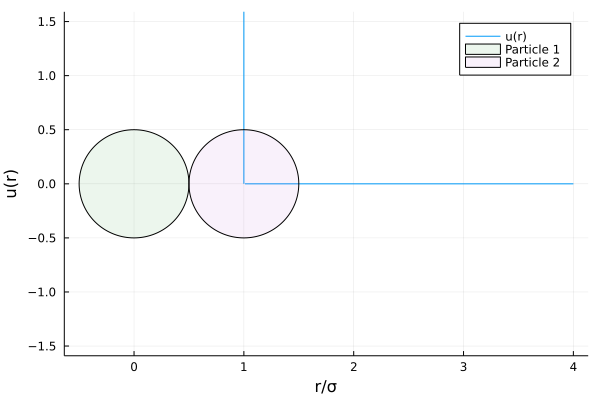

In [8]:
u(r,σ)= r < σ ? 1/0 : 0
r=range(0,4,length=100)
σ=1
contact=σ*range(1,1,length=100),range(0,10,length=100)
plot(r,u.(r,σ),ylims=[-1.5,1.5],label="u(r)",xlabel="r/σ",ylabel="u(r)")
plot!(contact,label=false,linecolor=1)
plot!(circleShape(0,0,0.5σ),seriestype=[:shape],fillalpha=0.1,label="Particle 1")
plot!(circleShape(σ,0,0.5σ),seriestype=[:shape],fillalpha=0.1,label="Particle 2")

# Hard core fluid and structure factor

### Thermodynamic Parameters
3D -> $\phi=\pi \rho\sigma^3/6$;                 

2D -> $\phi=\pi \rho\sigma^2/4$

### Sphere Approximations

- Percus-Yevick
- Verlet-Weiss correction

### Disk Approximation

- Fundamental Measure Theory


# Example

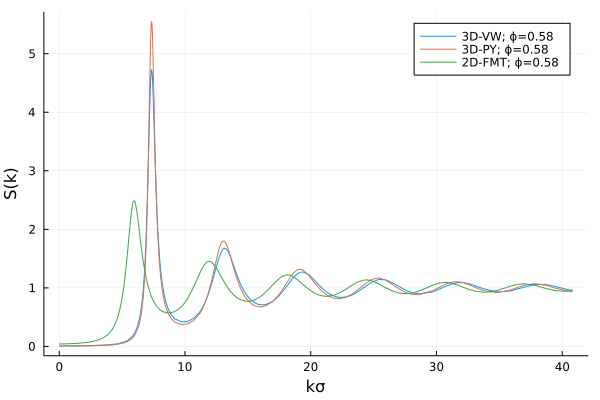

In [9]:
ϕ=0.58 #Volume fraction
liquid_HS = HardSpheres(ϕ); liquid_HD = HardDisks(ϕ) #Liquids definition
S_HS_VW = StructureFactor(liquid_HS, VerletWeis) #S(k) definition
S_HS_PY = StructureFactor(liquid_HS, PercusYevick)#S(k) definition
S_HD = StructureFactor(liquid_HD, RosenfeldFMT)# S(k) definition
plot(k -> S_HS_VW(k), 0, 13π, label = "3D-VW; ϕ="*string(ϕ),xlabel="kσ",ylabel="S(k)")
plot!(k -> S_HS_PY(k), 0, 13π, label = "3D-PY; ϕ="*string(ϕ))
plot!(k -> S_HD(k), 0, 13π, label = "2D-FMT; ϕ="*string(ϕ))

### Composite potentials

Hard Sphere + Attractive Yukawa


$u(r)=\begin{cases}
        \infty,~~~~~~~~~~~~~~~~~~~~~~~~~~~~ r\leq\sigma\\
        -\frac{\sigma \epsilon}{r} e^{-z(r/\sigma-1)},~~~~~~~~~~~ r> \sigma
\end{cases}$

Hard Sphere + Square Well


$u(r)=\begin{cases}
        \infty,~~~~~~~~~~~ r\leq\sigma\\
        -\epsilon,~~~~~~~~~~~ \sigma <r\geq \lambda \sigma\\
        0, ~~~~~~~~~~~~~   r \geq \lambda \sigma
\end{cases}$

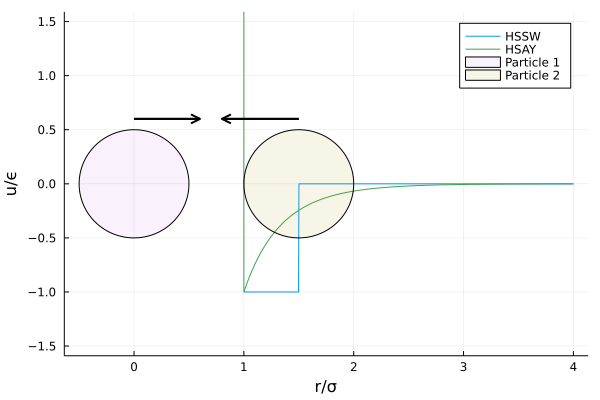

In [10]:
r=range(0,4,length=1000)
σ=1;λ=1.5;z=2
uHSSW(r,σ)= r < σ ? 1/0 : r < λ*σ ? -1 : 0
uHSAY(r,σ)= r < σ ? 1/0 : -exp(-z*(r-1))/r
contact=σ*range(1,1,length=100),range(-1,10,length=100)
plot(r,uHSSW.(r,σ),ylims=[-1.5,1.5],label="HSSW",xlabel="r/σ",ylabel="u/ϵ")
plot!(contact,label=false,linecolor=3)
plot!(r,uHSAY.(r,σ),ylims=[-1.5,1.5],label="HSAY",xlabel="r/σ",ylabel="u/ϵ")
plot!(circleShape(0,0,0.5σ),seriestype=[:shape],fillalpha=0.1,label="Particle 1")
plot!(circleShape(1.5σ,0,0.5σ),seriestype=[:shape],fillalpha=0.1,label="Particle 2")
plot!([0,0.6],[0.6,0.6],arrow=true,color=:black,linewidth=2,label="")
plot!([1.5,0.8],[0.6,0.6],arrow=true,color=:black,linewidth=2,label="")

### Potential and Thermodynamic Parameters

$(\phi=\pi \rho\sigma^3/6$;$T^*=k_BT/\epsilon )$

### Range of attraction parameters
$\lambda$; $z$


### Approximations
- Mean Field Theory

$c(r) \approx c_{HC}(r) - \beta u_a(r)$

- Modified Mean Field theory

$c(r) \approx c_{HC}(r) + \left[ exp(-\beta u_a(r))-1 \right]$

$S(k)=\frac{1}{1-\rho \hat{c}(k)}$

# Examples

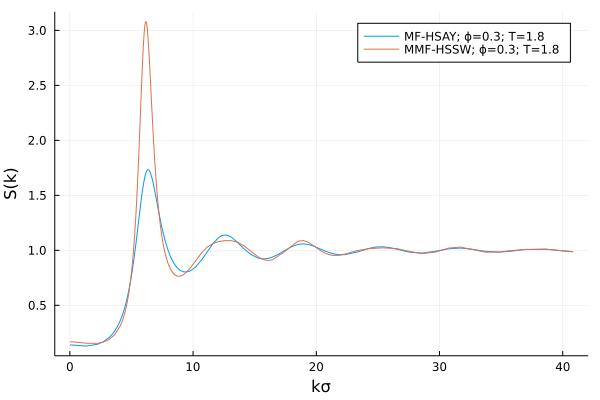

In [11]:
z=2.0; λ=1.5 ; T = 1.8; ϕ=0.3;
urHSAY = Yukawa{3}(z); urHSSW = SquareWell{3}(λ)
liquid_HSAY = AttractiveHardSpheres(ϕ,T,urHSAY)
liquid_HSSW = AttractiveHardSpheres(ϕ,T,urHSSW)
S_HSSW = StructureFactor(liquid_HSSW, NonLinearSharmaSharma{VerletWeis})
S_HSAY = StructureFactor(liquid_HSAY, SharmaSharma{VerletWeis})
plot(k -> S_HSAY(k), 0, 13π, label = "MF-HSAY; ϕ="*string(ϕ)*"; T="*string(T),xlabel="kσ", ylabel="S(k)");plot!(k -> S_HSSW(k), 0, 13π, label = "MMF-HSSW; ϕ="*string(ϕ)*"; T="*string(T))

# Liquids Dynamics

### Principal outputs

- Intermediate Scattering Function (ISF) $F(k,\tau)$
- Self part of the ISF $F_s(k,\tau)$
- Memory kernel or correlation time dependent friction $\Delta\zeta(\tau)$
- Mobility or long time dependent diffusion coefficient $D^*_L$


### Solution to SCGLE set of equations

$\hat{F}_s(k,z) =\frac{1}{z+\frac{k^2D_0}{1+\lambda(k)\Delta \zeta(z)}}$; $\hat{F}(k,z)=\frac{S(k)}{z+\frac{k^2D_0 S^{-1}(k)}{1+\lambda(k)\Delta \zeta(z)}}$

$\Delta\zeta^*(\tau)=\frac{D_0}{24\pi^3\bar{n}}\int _V k^2\Bigg[ \frac{S(k)-1}{S(k)} \Bigg]^2 F(k,\tau) F_s(k,\tau) d\mathbf{k}$

In [12]:
λ=1.5 ; T = 1.8; ϕ=0.35; urHSSW = SquareWell{3}(λ)
liquid_HSSW = AttractiveHardSpheres(ϕ,T,urHSSW); S_HSSW = StructureFactor(liquid_HSSW, NonLinearSharmaSharma{VerletWeis})
k₀ = 0; k₁ = 40; kₛ = ChebyshevGrid(k₀, k₁, 4064); #Grid creation
S₀ = StructureFactorGrid(S_HSSW,kₛ) #Setting the grid for the structure factor
dyn_var = dynamics(S₀, 2π); #Solving dynamics

In [13]:
τ  = dyn_var.τ
Fs = dyn_var.dvars.Fˢ
Fc = dyn_var.dvars.F
Δζ = dyn_var.dvars.ζ
Dl = dyn_var.b

(0.0032379946716030073)

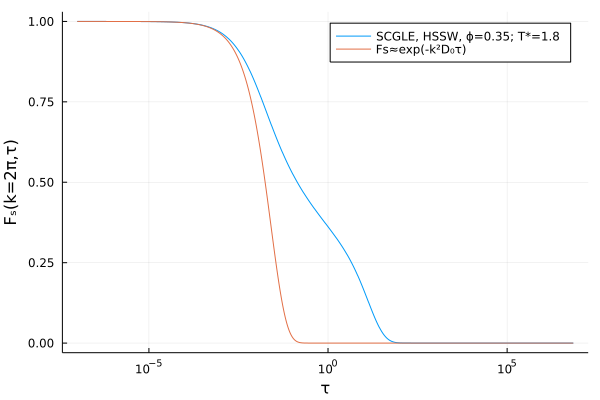

In [14]:
plot(τ,Fs,xaxis= :log10, label="SCGLE, HSSW, ϕ="*string(ϕ)*"; T*="*string(T), xlabel="τ", ylabel="Fₛ(k=2π,τ)")
plot!(τ,exp.(-4π^2*τ), label="Fs≈exp(-k²D₀τ)")

# Asymptotic solutions to SCGLE equations

$\lim_{\tau \to \infty} \Delta \zeta (\tau)=\Delta \zeta ^{\infty}$

$\lim_{\tau \to \infty} F(k,\tau)= f(k)$

$\lim_{\tau \to \infty} F_s(k,\tau)=f_s(k)$

# Asymptotic solutions to SCGLE equations

$\gamma\equiv D_0/ \Delta \zeta ^{\infty}$

$\gamma^{-1}=\frac{1}{3 (2\pi)^3 \bar{n}}\int d\mathbf{k}\frac{k^2+[S(k)-1]^2\lambda^2(k)}{[\lambda(k)S(k)+k^2\gamma][\lambda(k)+k^2\gamma]}$

### Solution to asymptotic equations

In [15]:
asymp   = asymptotics(S₀);  #Solving asymptotics
fs  = asymp.fˢ
fc  = asymp.f
Δζ∞ = asymp.ζ∞;

### Other non-implemented outputs

- $\alpha$-relaxation time $\tau_\alpha$
- Mean squared displacement $<(\Delta r)^2 >$
- Viscosity $\eta$
- Visco-elastic modulus $G'(\omega)$; $G''(\omega)$

# Systems with anisotropic interactions


- Dipolar Hard-sphere liquid (mixed arrested states)

*TODO: Add phase diagram*

In [16]:
η_dip = 0.59
T_dip = 0.15  # Reduced temperature

structure = StructureFactor(DipolarHardSpheres(η_dip, T_dip), MSA{VerletWeis})
grid = ChebyshevGrid(0, 50, 2^10)
S_dip = StructureFactorGrid(structure, grid)

k = 7.2;

In [17]:
hsdip_dyn = dynamics(S_dip, k; t = 1e7, n = 256);

In [18]:
τ  = hsdip_dyn.τ
Fˢ = hsdip_dyn.dvars.Fˢ
F  = hsdip_dyn.dvars.F
Δζ = hsdip_dyn.dvars.ζ
Dl = hsdip_dyn.b;

In [19]:
"Normalized transalational component of the ISF"
F₀₀ = (f -> f.t).(F) ./  first(F).t;
"Normalized (1,1)-projection of the ISF"
F₁₁ = (f -> f.r[2]).(F) ./  first(F).r[2];

### Mixed arrested states

Freezing of transaltional motion but fluid rotational state

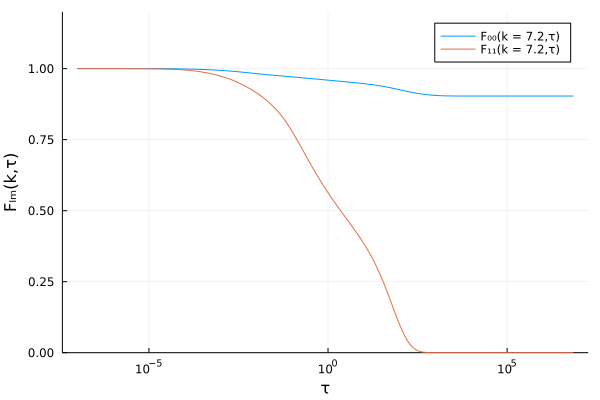

In [20]:
plot(τ, F₀₀, xaxis = :log10, ylims = (0,1.2), label = "F₀₀(k = $k,τ)", xlabel = "τ", ylabel = "Fₗₘ(k,τ)")
plot!(τ, F₁₁, xaxis = :log10, label = "F₁₁(k = $k,τ)")

# Acknowledgements

- CONACyT grants LANIMFE 
- Pablo Fernando Zubieta Rico
- Ernesto Carlos Cortes Morales

# Excercises

- Make a function to compute $g(r)$ for any given $S(k)$
- Make a function to find $S(k_{max};\phi,T)=cte.$ and trace for Verlet crystallization criterion
- Make a function to compute $\tau_\alpha$ from the dynamics $F_s$
- Make a function to compute $\gamma$ and to compare with asymp



In [63]:
#Excercise (1)

function g(r,ρ,Sk)
    if r>1
        k₀=0
        k₁=100
        np=300
        CC=ChebyshevGrid(k₀, k₁, np)
        ks=nodes(CC)
        kw=ApproximationGrids.weights(CC).*ks
        dk=jacobian(CC)
        gr= sum((Sk.(ks).-1).*sin.(ks.*r).*kw)*dk
        gr= gr/(2π * ρ * r )+1
    else
        gr=0
    end
    return gr
end

g (generic function with 1 method)

In [82]:
λ=1.5 ; T = 2; ϕ=0.1; urHSSW = SquareWell{3}(λ)
liquid_HSSW = AttractiveHardSpheres(ϕ,T,urHSSW); 
S_HSSW = StructureFactor(liquid_HSSW, NonLinearSharmaSharma{VerletWeis})

(::StructureFactor{AttractiveHardSpheres{Float64, CompositePotential{3, HardCore{Int64, 3}, SquareWell{Float64, 3}}}, NonLinearSharmaSharma{VerletWeis{Float64}, Float64}}) (generic function with 1 method)

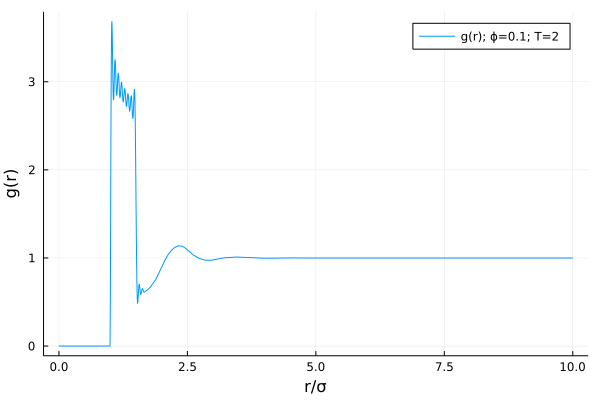

In [83]:
plot(r -> g(r,6ϕ/π ,S_HSSW), 0, 10, label = "g(r); ϕ=$ϕ; T=$T",xlabel="r/σ", ylabel="g(r)")